In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
pd.set_option('display.max_rows', 90)

df = pd.read_csv("C:/Users/marcio/Documents/fish_analyzer_final.csv", index_col=0)
import ast
#df['tail_coords'] = df['tail_coords'].apply(ast.literal_eval)
df['center_of_mass'] = df['center_of_mass'].apply(ast.literal_eval)

#df['head'] = df['head'].apply(ast.literal_eval)



In [2]:
df.groupby(["quadrant", "fish_id"])["sequence"].count()

quadrant  fish_id
0         1          2004
          2          1642
1         1          1097
          2          1366
2         1          1278
          2          1574
3         1           503
          2           417
Name: sequence, dtype: int64

In [3]:
#df = df.loc[(df["quadrant"] == 3) & (df["fish_id"] == 1)]
df['tail_coords'] = df['tail_coords'].apply(ast.literal_eval)


In [4]:
df["tail_uniformity"] = np.NaN

def vari(the_tuple):
    if isinstance(the_tuple, tuple):
        y_tuple = tuple(zip(*the_tuple))[1]
        cv = lambda x: np.std(x, ddof=1) / np.mean(x) * 100        
        result = cv(y_tuple)
        if result is not None:      
            return result
        else:
            return np.NaN
    else:
        np.NaN

df["tail_uniformity"] = df.tail_coords.apply(vari)

In [5]:
df

,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,quad_coord,sequence,tail_coords,take,tail_uniformity
frame_number,,,,,,,,,,,,
1276,17.720045,"(680, 478)","(646, 463)","(697, 483)",1,356.0,2,"(440, 426, 408, 444)",21350,"((1.0, 1.0), (1.0315502838419943, 1.0), (1.063...",69,0.176013
1277,18.027756,"(682, 478)","(648, 463)","(699, 484)",1,361.0,2,"(440, 426, 408, 444)",21350,"((1.0, 1.0019270916974465), (1.030902797752337...",69,0.161170
1278,18.027756,"(684, 479)","(648, 463)","(701, 485)",1,361.0,2,"(440, 426, 408, 444)",21350,"((1.0, 1.0), (1.030986970014337, 1.0), (1.0619...",69,0.353731
1279,17.720045,"(686, 480)","(651, 466)","(703, 485)",1,354.0,2,"(440, 426, 408, 444)",21350,"((1.0, 0.9979858792876038), (1.032105088161948...",69,0.305088
1280,17.720045,"(689, 481)","(654, 469)","(706, 486)",1,352.5,2,"(440, 426, 408, 444)",21350,"((1.0, 1.0), (1.0324424097190523, 1.0), (1.064...",69,0.107323
...,...,...,...,...,...,...,...,...,...,...,...,...
18984,17.029386,"(803, 402)","(768, 404)","(820, 403)",2,272.5,1,"(440, 0, 408, 403)",36221,"((1.0, 0.9975210304521271), (1.296642464324175...",103,0.408552
18985,16.031220,"(808, 402)","(774, 401)","(824, 403)",2,258.0,1,"(440, 0, 408, 403)",36221,"((1.0, 0.9958683840868785), (1.365455546974131...",103,0.251093
18986,17.029386,"(812, 402)","(777, 400)","(829, 403)",2,278.0,1,"(440, 0, 408, 403)",36221,"((1.0, 0.9999999999999999), (1.294553914570478...",103,0.135914


In [6]:
df["ant"] = df["tail_coords"].apply(lambda x: tuple(zip(*x))[1][-3])
df["pen"] = df["tail_coords"].apply(lambda x: tuple(zip(*x))[1][-2])
df["ult"] = df["tail_coords"].apply(lambda x: tuple(zip(*x))[1][-1])


In [7]:
df["cycle"] = np.NAN   

sequnces_list = df.sequence.unique()

for n in sequnces_list:
    print(n)
    the_idxs = df.loc[df["sequence"] == n].index
    cycle_number = 1
    for real_index, nominal_index in enumerate(the_idxs):       
        current_position = df.loc[(df.index == nominal_index) & (df["sequence"] == n), "ult"].iloc[0]
        print(current_position)
        print(real_index)       
        if real_index == 0:
            last_position = current_position
                    
        elif real_index == 1:           
            if current_position > last_position:                
                trend = "up"
                
            elif current_position < last_position:
                trend = "down"
                
            else:
                trend = "undefined"
                #  Keep the same last_tail_direction                
                              
        else:
            if (current_position > last_position) & (trend=="undefined"):
                trend = "up"
                print("first")
            elif (current_position < last_position) & (trend=="undefined"):
                trend = "down"
                print("second")
            elif (current_position > last_position) & (trend=="dow"):
                cycle_number=cycle_number+1
            
            elif (current_position < last_position) & (trend=="up"):
                cycle_number=cycle_number+1    
                print("third")           

            elif (current_position == last_position):
                pass
            
           
  
        last_position = current_position
        
        df.loc[(df.index == nominal_index) & (df["sequence"] == n), "cycle"] = cycle_number    
    
    
    
    

21350
1.0039404336414608
0
1.0019270916974468
1
1.0079221987311107
2
1.0060423621371883
3
0.998042097034399
4
1.001953832481265
5
21353
1.0
0
0.9965564837235426
1
0.9873287008609651
2
0.9910085385534617
3
1.0
4
1.0043940782530412
5
0.9850452771372582
6
5
1.0190680623090749
0
1.0190680623090749
1
1.022710220712681
2
first
1.0029005247289315
3
third
0.9985251848958109
4
third
0.9985251848958109
5
0.9834293208092568
6
third
6
1.0028961564687977
0
1.0
1
1.0
2
1.0028961564687975
3
1.0028961564687975
4
1.0043507870933976
5
8
1.002914735866067
0
1.0029005247289315
1
1.0029005247289315
2
1.0029005247289315
3
1.0029005247289315
4
1.0029005247289315
5
1.0014551731018093
6
1.0
7
1.0
8
1.0
9
1.0
10
14649
0.9988506589389736
0
0.9980577724221805
1
0.9991596638655462
2
0.9976887491823949
3
1.0
4
1.0020875913861496
5
1.0
6
1.001040908291434
7
9
1.0
0
1.0
1
1.0
2
1.0242109885958324
3
first
1.0
4
third
1.0
5
1.0
6
1.0
7
1.0045579674311782
8
1.0014502623644657
9
third
1.0029005247289315
10
1.002900524728

df["cycle"] = np.NAN   

sequnces_list = df.sequence.unique()

for n in sequnces_list:
    print(n)
    the_idxs = df.loc[df["sequence"] == n].index
    print(the_idxs)    
    cycle_number = 1
    count=0  
    for i in the_idxs:       
        #df.loc[i, "cycle"] = cycle_number
        df.loc[(df.index == i) & (df["sequence"] == n), "cycle"] = cycle_number

        count=count+1        
        if count == 6:
            cycle_number=cycle_number+1
            count = 0 
                
        
            

In [8]:
df

,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,quad_coord,sequence,tail_coords,take,tail_uniformity,ant,pen,ult,cycle
frame_number,,,,,,,,,,,,,,,,
1276,17.720045,"(680, 478)","(646, 463)","(697, 483)",1,356.0,2,"(440, 426, 408, 444)",21350,"((1.0, 1.0), (1.0315502838419943, 1.0), (1.063...",69,0.176013,1.0,1.001970,1.003940,1.0
1277,18.027756,"(682, 478)","(648, 463)","(699, 484)",1,361.0,2,"(440, 426, 408, 444)",21350,"((1.0, 1.0019270916974465), (1.030902797752337...",69,0.161170,1.0,0.998073,1.001927,1.0
1278,18.027756,"(684, 479)","(648, 463)","(701, 485)",1,361.0,2,"(440, 426, 408, 444)",21350,"((1.0, 1.0), (1.030986970014337, 1.0), (1.0619...",69,0.353731,1.0,1.000000,1.007922,1.0
1279,17.720045,"(686, 480)","(651, 466)","(703, 485)",1,354.0,2,"(440, 426, 408, 444)",21350,"((1.0, 0.9979858792876038), (1.032105088161948...",69,0.305088,1.0,1.002014,1.006042,1.0
1280,17.720045,"(689, 481)","(654, 469)","(706, 486)",1,352.5,2,"(440, 426, 408, 444)",21350,"((1.0, 1.0), (1.0324424097190523, 1.0), (1.064...",69,0.107323,1.0,0.998042,0.998042,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18984,17.029386,"(803, 402)","(768, 404)","(820, 403)",2,272.5,1,"(440, 0, 408, 403)",36221,"((1.0, 0.9975210304521271), (1.296642464324175...",103,0.408552,1.0,0.997521,0.990084,1.0
18985,16.031220,"(808, 402)","(774, 401)","(824, 403)",2,258.0,1,"(440, 0, 408, 403)",36221,"((1.0, 0.9958683840868785), (1.365455546974131...",103,0.251093,1.0,1.000000,0.995042,1.0
18986,17.029386,"(812, 402)","(777, 400)","(829, 403)",2,278.0,1,"(440, 0, 408, 403)",36221,"((1.0, 0.9999999999999999), (1.294553914570478...",103,0.135914,1.0,0.997521,0.997521,1.0


<AxesSubplot:>

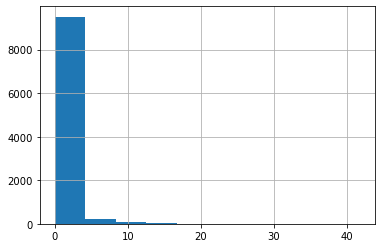

In [9]:
df["tail_uniformity"].hist()

In [10]:
#pd.set_option('display.max_colwidth', None)
#df.loc[df["sequence"] == 7638]



In [11]:
df

,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,quad_coord,sequence,tail_coords,take,tail_uniformity,ant,pen,ult,cycle
frame_number,,,,,,,,,,,,,,,,
1276,17.720045,"(680, 478)","(646, 463)","(697, 483)",1,356.0,2,"(440, 426, 408, 444)",21350,"((1.0, 1.0), (1.0315502838419943, 1.0), (1.063...",69,0.176013,1.0,1.001970,1.003940,1.0
1277,18.027756,"(682, 478)","(648, 463)","(699, 484)",1,361.0,2,"(440, 426, 408, 444)",21350,"((1.0, 1.0019270916974465), (1.030902797752337...",69,0.161170,1.0,0.998073,1.001927,1.0
1278,18.027756,"(684, 479)","(648, 463)","(701, 485)",1,361.0,2,"(440, 426, 408, 444)",21350,"((1.0, 1.0), (1.030986970014337, 1.0), (1.0619...",69,0.353731,1.0,1.000000,1.007922,1.0
1279,17.720045,"(686, 480)","(651, 466)","(703, 485)",1,354.0,2,"(440, 426, 408, 444)",21350,"((1.0, 0.9979858792876038), (1.032105088161948...",69,0.305088,1.0,1.002014,1.006042,1.0
1280,17.720045,"(689, 481)","(654, 469)","(706, 486)",1,352.5,2,"(440, 426, 408, 444)",21350,"((1.0, 1.0), (1.0324424097190523, 1.0), (1.064...",69,0.107323,1.0,0.998042,0.998042,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18984,17.029386,"(803, 402)","(768, 404)","(820, 403)",2,272.5,1,"(440, 0, 408, 403)",36221,"((1.0, 0.9975210304521271), (1.296642464324175...",103,0.408552,1.0,0.997521,0.990084,1.0
18985,16.031220,"(808, 402)","(774, 401)","(824, 403)",2,258.0,1,"(440, 0, 408, 403)",36221,"((1.0, 0.9958683840868785), (1.365455546974131...",103,0.251093,1.0,1.000000,0.995042,1.0
18986,17.029386,"(812, 402)","(777, 400)","(829, 403)",2,278.0,1,"(440, 0, 408, 403)",36221,"((1.0, 0.9999999999999999), (1.294553914570478...",103,0.135914,1.0,0.997521,0.997521,1.0


In [12]:
df[df.index.duplicated()]



,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,quad_coord,sequence,tail_coords,take,tail_uniformity,ant,pen,ult,cycle
frame_number,,,,,,,,,,,,,,,,
1292,17.204651,"(724, 499)","(695, 474)","(738, 509)",1,357.5,2,"(440, 426, 408, 444)",21353,"((1.0, 1.0015008219250676), (1.030569387926777...",69,0.082154,1.0,1.001501,1.000000,1.0
1293,17.804494,"(726, 501)","(699, 476)","(740, 512)",1,357.5,2,"(440, 426, 408, 444)",21353,"((1.0, 0.9984181318289052), (1.032824715041389...",69,0.224754,1.0,1.000000,1.004394,1.0
1294,16.970563,"(731, 504)","(700, 481)","(743, 516)",1,353.5,2,"(440, 426, 408, 444)",21353,"((1.0, 0.9985193343700255), (1.033745313144293...",69,0.634855,1.0,0.994522,0.985045,1.0
1312,21.840330,"(139, 664)","(185, 654)","(118, 670)",0,618.0,1,"(0, 430, 414, 440)",8,"((1.0, 1.0014502623644659), (4.576601912966246...",1,0.121197,1.0,1.001450,1.002901,1.0
1313,21.840330,"(139, 664)","(185, 654)","(118, 670)",0,617.5,1,"(0, 430, 414, 440)",8,"((1.0, 1.0012430820266849), (3.974260394142054...",1,0.120315,1.0,1.001450,1.002901,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18979,16.124515,"(779, 401)","(745, 400)","(795, 403)",2,267.0,1,"(440, 0, 408, 403)",36221,"((1.0, 1.0), (1.3002336716562466, 1.0), (1.600...",103,0.539397,1.0,0.995093,0.987732,1.0
18980,15.033296,"(784, 402)","(752, 398)","(799, 403)",2,248.0,1,"(440, 0, 408, 403)",36221,"((1.0, 1.0024392554121664), (1.291403713905742...",103,0.267337,1.0,1.000000,0.995121,1.0
18981,15.033296,"(789, 402)","(756, 397)","(804, 403)",2,251.0,1,"(440, 0, 408, 403)",36221,"((1.0, 1.0), (1.292363579464445, 1.0), (1.5847...",103,0.221361,1.0,1.000000,1.004955,1.0


In [13]:
df['diffs'] = df.groupby(["sequence", "cycle"])['ult'].diff()
df['speed_frame']=df['diffs'].apply(lambda x: abs(x))


In [14]:
#df["velocity"] = np.NaN

temp = df.groupby(["sequence", "cycle"])["speed_frame"].apply(lambda grp: grp.mean())
temp = temp.reset_index()

#df["velocity"] = temp["cycle"]


In [15]:
df

,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,quad_coord,sequence,tail_coords,take,tail_uniformity,ant,pen,ult,cycle,diffs,speed_frame
frame_number,,,,,,,,,,,,,,,,,,
1276,17.720045,"(680, 478)","(646, 463)","(697, 483)",1,356.0,2,"(440, 426, 408, 444)",21350,"((1.0, 1.0), (1.0315502838419943, 1.0), (1.063...",69,0.176013,1.0,1.001970,1.003940,1.0,NaN,NaN
1277,18.027756,"(682, 478)","(648, 463)","(699, 484)",1,361.0,2,"(440, 426, 408, 444)",21350,"((1.0, 1.0019270916974465), (1.030902797752337...",69,0.161170,1.0,0.998073,1.001927,1.0,-0.002013,0.002013
1278,18.027756,"(684, 479)","(648, 463)","(701, 485)",1,361.0,2,"(440, 426, 408, 444)",21350,"((1.0, 1.0), (1.030986970014337, 1.0), (1.0619...",69,0.353731,1.0,1.000000,1.007922,1.0,0.005995,0.005995
1279,17.720045,"(686, 480)","(651, 466)","(703, 485)",1,354.0,2,"(440, 426, 408, 444)",21350,"((1.0, 0.9979858792876038), (1.032105088161948...",69,0.305088,1.0,1.002014,1.006042,1.0,-0.001880,0.001880
1280,17.720045,"(689, 481)","(654, 469)","(706, 486)",1,352.5,2,"(440, 426, 408, 444)",21350,"((1.0, 1.0), (1.0324424097190523, 1.0), (1.064...",69,0.107323,1.0,0.998042,0.998042,1.0,-0.008000,0.008000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18984,17.029386,"(803, 402)","(768, 404)","(820, 403)",2,272.5,1,"(440, 0, 408, 403)",36221,"((1.0, 0.9975210304521271), (1.296642464324175...",103,0.408552,1.0,0.997521,0.990084,1.0,-0.000006,0.000006
18985,16.031220,"(808, 402)","(774, 401)","(824, 403)",2,258.0,1,"(440, 0, 408, 403)",36221,"((1.0, 0.9958683840868785), (1.365455546974131...",103,0.251093,1.0,1.000000,0.995042,1.0,0.004958,0.004958
18986,17.029386,"(812, 402)","(777, 400)","(829, 403)",2,278.0,1,"(440, 0, 408, 403)",36221,"((1.0, 0.9999999999999999), (1.294553914570478...",103,0.135914,1.0,0.997521,0.997521,1.0,0.002479,0.002479


In [16]:
df = df.reset_index()
temp = temp.rename(columns={"speed_frame":"speed_cycle"})
        
df = df.merge(temp, on=["sequence", "cycle"]) #.set_axis(df.index)
df.head(5)

,frame_number,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,quad_coord,sequence,tail_coords,take,tail_uniformity,ant,pen,ult,cycle,diffs,speed_frame,speed_cycle
0,1276,17.720045,"(680, 478)","(646, 463)","(697, 483)",1,356.0,2,"(440, 426, 408, 444)",21350,"((1.0, 1.0), (1.0315502838419943, 1.0), (1.063...",69,0.176013,1.0,1.001970,1.003940,1.0,NaN,NaN,0.00436
1,1277,18.027756,"(682, 478)","(648, 463)","(699, 484)",1,361.0,2,"(440, 426, 408, 444)",21350,"((1.0, 1.0019270916974465), (1.030902797752337...",69,0.161170,1.0,0.998073,1.001927,1.0,-0.002013,0.002013,0.00436
2,1278,18.027756,"(684, 479)","(648, 463)","(701, 485)",1,361.0,2,"(440, 426, 408, 444)",21350,"((1.0, 1.0), (1.030986970014337, 1.0), (1.0619...",69,0.353731,1.0,1.000000,1.007922,1.0,0.005995,0.005995,0.00436
3,1279,17.720045,"(686, 480)","(651, 466)","(703, 485)",1,354.0,2,"(440, 426, 408, 444)",21350,"((1.0, 0.9979858792876038), (1.032105088161948...",69,0.305088,1.0,1.002014,1.006042,1.0,-0.001880,0.001880,0.00436
4,1280,17.720045,"(689, 481)","(654, 469)","(706, 486)",1,352.5,2,"(440, 426, 408, 444)",21350,"((1.0, 1.0), (1.0324424097190523, 1.0), (1.064...",69,0.107323,1.0,0.998042,0.998042,1.0,-0.008000,0.008000,0.00436


In [17]:

df = df.set_index('frame_number')


In [18]:
df

,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,quad_coord,sequence,tail_coords,take,tail_uniformity,ant,pen,ult,cycle,diffs,speed_frame,speed_cycle
frame_number,,,,,,,,,,,,,,,,,,,
1276,17.720045,"(680, 478)","(646, 463)","(697, 483)",1,356.0,2,"(440, 426, 408, 444)",21350,"((1.0, 1.0), (1.0315502838419943, 1.0), (1.063...",69,0.176013,1.0,1.001970,1.003940,1.0,NaN,NaN,0.004360
1277,18.027756,"(682, 478)","(648, 463)","(699, 484)",1,361.0,2,"(440, 426, 408, 444)",21350,"((1.0, 1.0019270916974465), (1.030902797752337...",69,0.161170,1.0,0.998073,1.001927,1.0,-0.002013,0.002013,0.004360
1278,18.027756,"(684, 479)","(648, 463)","(701, 485)",1,361.0,2,"(440, 426, 408, 444)",21350,"((1.0, 1.0), (1.030986970014337, 1.0), (1.0619...",69,0.353731,1.0,1.000000,1.007922,1.0,0.005995,0.005995,0.004360
1279,17.720045,"(686, 480)","(651, 466)","(703, 485)",1,354.0,2,"(440, 426, 408, 444)",21350,"((1.0, 0.9979858792876038), (1.032105088161948...",69,0.305088,1.0,1.002014,1.006042,1.0,-0.001880,0.001880,0.004360
1280,17.720045,"(689, 481)","(654, 469)","(706, 486)",1,352.5,2,"(440, 426, 408, 444)",21350,"((1.0, 1.0), (1.0324424097190523, 1.0), (1.064...",69,0.107323,1.0,0.998042,0.998042,1.0,-0.008000,0.008000,0.004360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18984,17.029386,"(803, 402)","(768, 404)","(820, 403)",2,272.5,1,"(440, 0, 408, 403)",36221,"((1.0, 0.9975210304521271), (1.296642464324175...",103,0.408552,1.0,0.997521,0.990084,1.0,-0.000006,0.000006,0.006163
18985,16.031220,"(808, 402)","(774, 401)","(824, 403)",2,258.0,1,"(440, 0, 408, 403)",36221,"((1.0, 0.9958683840868785), (1.365455546974131...",103,0.251093,1.0,1.000000,0.995042,1.0,0.004958,0.004958,0.006163
18986,17.029386,"(812, 402)","(777, 400)","(829, 403)",2,278.0,1,"(440, 0, 408, 403)",36221,"((1.0, 0.9999999999999999), (1.294553914570478...",103,0.135914,1.0,0.997521,0.997521,1.0,0.002479,0.002479,0.006163


In [19]:
df.columns

Index(['length_of_fish', 'center_of_mass', 'fish_tail', 'fish_head',
       'quadrant', 'fish_area', 'fish_id', 'quad_coord', 'sequence',
       'tail_coords', 'take', 'tail_uniformity', 'ant', 'pen', 'ult', 'cycle',
       'diffs', 'speed_frame', 'speed_cycle'],
      dtype='object')

In [20]:
#df["distance_cycle"] = np.NaN
import math
temp = df.groupby(["sequence", "cycle"])
#temp = temp.reset_index()
the_firsts = temp.head(1)
#print(the_firsts.columns)
the_lasts = temp.tail(1)
the_firsts["distance_cycle"] = np.NaN
#print(the_firsts.columns)

for i in range(0, len(the_firsts)):
    #the_idxs = df.loc[df["sequence"] == i].index
    first_com = the_firsts.iloc[i, 1]
    last_com = the_lasts.iloc[i, 1]
    the_firsts.iloc[i, 19] = math.hypot((first_com[0] - last_com[0]), (first_com[1] - last_com[1]))
      
    
    
temp = the_firsts[["sequence", "cycle", "distance_cycle"]]
#temp = temp.rename(columns={"distance":"distance_g"})
df = df.reset_index()

df = df.merge(temp, on=["sequence", "cycle"])

    
df = df.set_index('frame_number')        
    
    



<ipython-input-20-0b10f3fc85ef>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  the_firsts["distance_cycle"] = np.NaN
c:\Users\marcio\Miniconda3\envs\medaka_env\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


<AxesSubplot:>

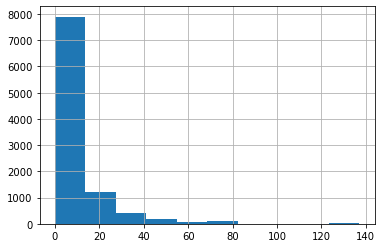

In [21]:
filt = df[["cycle", "fish_id", "quadrant", "sequence", "distance_cycle", "take"]]
filt["distance_cycle"].hist()
#filt[filt["distance_cycle"] > 20]


In [22]:
    
df

,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,quad_coord,sequence,tail_coords,take,tail_uniformity,ant,pen,ult,cycle,diffs,speed_frame,speed_cycle,distance_cycle
frame_number,,,,,,,,,,,,,,,,,,,,
1276,17.720045,"(680, 478)","(646, 463)","(697, 483)",1,356.0,2,"(440, 426, 408, 444)",21350,"((1.0, 1.0), (1.0315502838419943, 1.0), (1.063...",69,0.176013,1.0,1.001970,1.003940,1.0,NaN,NaN,0.004360,11.401754
1277,18.027756,"(682, 478)","(648, 463)","(699, 484)",1,361.0,2,"(440, 426, 408, 444)",21350,"((1.0, 1.0019270916974465), (1.030902797752337...",69,0.161170,1.0,0.998073,1.001927,1.0,-0.002013,0.002013,0.004360,11.401754
1278,18.027756,"(684, 479)","(648, 463)","(701, 485)",1,361.0,2,"(440, 426, 408, 444)",21350,"((1.0, 1.0), (1.030986970014337, 1.0), (1.0619...",69,0.353731,1.0,1.000000,1.007922,1.0,0.005995,0.005995,0.004360,11.401754
1279,17.720045,"(686, 480)","(651, 466)","(703, 485)",1,354.0,2,"(440, 426, 408, 444)",21350,"((1.0, 0.9979858792876038), (1.032105088161948...",69,0.305088,1.0,1.002014,1.006042,1.0,-0.001880,0.001880,0.004360,11.401754
1280,17.720045,"(689, 481)","(654, 469)","(706, 486)",1,352.5,2,"(440, 426, 408, 444)",21350,"((1.0, 1.0), (1.0324424097190523, 1.0), (1.064...",69,0.107323,1.0,0.998042,0.998042,1.0,-0.008000,0.008000,0.004360,11.401754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18984,17.029386,"(803, 402)","(768, 404)","(820, 403)",2,272.5,1,"(440, 0, 408, 403)",36221,"((1.0, 0.9975210304521271), (1.296642464324175...",103,0.408552,1.0,0.997521,0.990084,1.0,-0.000006,0.000006,0.006163,47.010637
18985,16.031220,"(808, 402)","(774, 401)","(824, 403)",2,258.0,1,"(440, 0, 408, 403)",36221,"((1.0, 0.9958683840868785), (1.365455546974131...",103,0.251093,1.0,1.000000,0.995042,1.0,0.004958,0.004958,0.006163,47.010637
18986,17.029386,"(812, 402)","(777, 400)","(829, 403)",2,278.0,1,"(440, 0, 408, 403)",36221,"((1.0, 0.9999999999999999), (1.294553914570478...",103,0.135914,1.0,0.997521,0.997521,1.0,0.002479,0.002479,0.006163,47.010637


In [23]:
df["tail_diff"] = df["pen"] - df["ult"]


<AxesSubplot:>

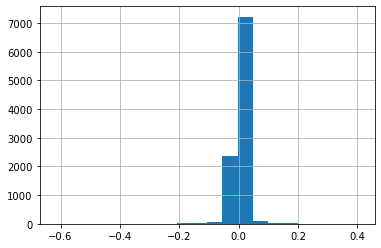

In [24]:
df["tail_diff"].hist(bins=20)

In [25]:


temp_max = df.groupby(["sequence", "cycle"])["tail_diff"].max()
temp_max = temp_max.reset_index()
temp_max = temp_max.rename(columns={"tail_diff":"tail_diff_max"})
df = df.reset_index()
df = df.merge(temp_max, on=["sequence", "cycle"]).set_axis(df.index)
df = df.set_index('frame_number')   

temp_min = df.groupby(["sequence", "cycle"])["tail_diff"].min()
temp_min = temp_min.reset_index()
temp_min = temp_min.rename(columns={"tail_diff":"tail_diff_min"})
df = df.reset_index()
df = df.merge(temp_min, on=["sequence", "cycle"]).set_axis(df.index)
df = df.set_index('frame_number')
df["tail_diff_min"] = df["tail_diff_min"].apply(lambda x: abs(x))



In [26]:
df["amplitude_cycle"] = df["tail_diff_max"] + df["tail_diff_min"]



<AxesSubplot:>

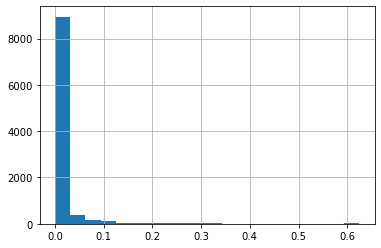

In [27]:
df["amplitude_cycle"].hist(bins=20)

In [28]:
df.head(6)

,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,quad_coord,sequence,tail_coords,...,ult,cycle,diffs,speed_frame,speed_cycle,distance_cycle,tail_diff,tail_diff_max,tail_diff_min,amplitude_cycle
frame_number,,,,,,,,,,,,,,,,,,,,,
1276,17.720045,"(680, 478)","(646, 463)","(697, 483)",1,356.0,2,"(440, 426, 408, 444)",21350,"((1.0, 1.0), (1.0315502838419943, 1.0), (1.063...",...,1.003940,1.0,NaN,NaN,0.00436,11.401754,-1.970217e-03,2.220446e-16,0.007922,0.007922
1277,18.027756,"(682, 478)","(648, 463)","(699, 484)",1,361.0,2,"(440, 426, 408, 444)",21350,"((1.0, 1.0019270916974465), (1.030902797752337...",...,1.001927,1.0,-0.002013,0.002013,0.00436,11.401754,-3.854183e-03,2.220446e-16,0.007922,0.007922
1278,18.027756,"(684, 479)","(648, 463)","(701, 485)",1,361.0,2,"(440, 426, 408, 444)",21350,"((1.0, 1.0), (1.030986970014337, 1.0), (1.0619...",...,1.007922,1.0,0.005995,0.005995,0.00436,11.401754,-7.922199e-03,2.220446e-16,0.007922,0.007922
1279,17.720045,"(686, 480)","(651, 466)","(703, 485)",1,354.0,2,"(440, 426, 408, 444)",21350,"((1.0, 0.9979858792876038), (1.032105088161948...",...,1.006042,1.0,-0.001880,0.001880,0.00436,11.401754,-4.028241e-03,2.220446e-16,0.007922,0.007922
1280,17.720045,"(689, 481)","(654, 469)","(706, 486)",1,352.5,2,"(440, 426, 408, 444)",21350,"((1.0, 1.0), (1.0324424097190523, 1.0), (1.064...",...,0.998042,1.0,-0.008000,0.008000,0.00436,11.401754,2.220446e-16,2.220446e-16,0.007922,0.007922
1281,17.720045,"(691, 481)","(656, 468)","(708, 486)",1,360.0,2,"(440, 426, 408, 444)",21350,"((1.0, 1.001953832481265), (1.031075590734383,...",...,1.001954,1.0,0.003912,0.003912,0.00436,11.401754,0.000000e+00,2.220446e-16,0.007922,0.007922


In [29]:
temp = df.groupby(["sequence", "cycle"])["length_of_fish"].mean()
temp = temp.reset_index()
temp = temp.rename(columns={"length_of_fish":"length_of_fish_group"})
df = df.reset_index()
df = df.merge(temp, on=["sequence", "cycle"]).set_axis(df.index)
df = df.set_index('frame_number')


In [30]:
df

,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,quad_coord,sequence,tail_coords,...,cycle,diffs,speed_frame,speed_cycle,distance_cycle,tail_diff,tail_diff_max,tail_diff_min,amplitude_cycle,length_of_fish_group
frame_number,,,,,,,,,,,,,,,,,,,,,
1276,17.720045,"(680, 478)","(646, 463)","(697, 483)",1,356.0,2,"(440, 426, 408, 444)",21350,"((1.0, 1.0), (1.0315502838419943, 1.0), (1.063...",...,1.0,NaN,NaN,0.004360,11.401754,-1.970217e-03,2.220446e-16,0.007922,0.007922,17.822616
1277,18.027756,"(682, 478)","(648, 463)","(699, 484)",1,361.0,2,"(440, 426, 408, 444)",21350,"((1.0, 1.0019270916974465), (1.030902797752337...",...,1.0,-0.002013,0.002013,0.004360,11.401754,-3.854183e-03,2.220446e-16,0.007922,0.007922,17.822616
1278,18.027756,"(684, 479)","(648, 463)","(701, 485)",1,361.0,2,"(440, 426, 408, 444)",21350,"((1.0, 1.0), (1.030986970014337, 1.0), (1.0619...",...,1.0,0.005995,0.005995,0.004360,11.401754,-7.922199e-03,2.220446e-16,0.007922,0.007922,17.822616
1279,17.720045,"(686, 480)","(651, 466)","(703, 485)",1,354.0,2,"(440, 426, 408, 444)",21350,"((1.0, 0.9979858792876038), (1.032105088161948...",...,1.0,-0.001880,0.001880,0.004360,11.401754,-4.028241e-03,2.220446e-16,0.007922,0.007922,17.822616
1280,17.720045,"(689, 481)","(654, 469)","(706, 486)",1,352.5,2,"(440, 426, 408, 444)",21350,"((1.0, 1.0), (1.0324424097190523, 1.0), (1.064...",...,1.0,-0.008000,0.008000,0.004360,11.401754,2.220446e-16,2.220446e-16,0.007922,0.007922,17.822616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18984,17.029386,"(803, 402)","(768, 404)","(820, 403)",2,272.5,1,"(440, 0, 408, 403)",36221,"((1.0, 0.9975210304521271), (1.296642464324175...",...,1.0,-0.000006,0.000006,0.006163,47.010637,7.436909e-03,1.226858e-02,0.004975,0.017244,15.957506
18985,16.031220,"(808, 402)","(774, 401)","(824, 403)",2,258.0,1,"(440, 0, 408, 403)",36221,"((1.0, 0.9958683840868785), (1.365455546974131...",...,1.0,0.004958,0.004958,0.006163,47.010637,4.957939e-03,1.226858e-02,0.004975,0.017244,15.957506
18986,17.029386,"(812, 402)","(777, 400)","(829, 403)",2,278.0,1,"(440, 0, 408, 403)",36221,"((1.0, 0.9999999999999999), (1.294553914570478...",...,1.0,0.002479,0.002479,0.006163,47.010637,0.000000e+00,1.226858e-02,0.004975,0.017244,15.957506


In [31]:
#df=df.loc[df["speed_cycle"] < 110]
#df=df.loc[df["distance_cycle"] < 38]
#df=df.loc[df["amplitude_cycle"] < 160]

In [32]:
temp = df.groupby(["sequence", "cycle"])["tail_uniformity"].max()
temp = temp.reset_index()
df = df.reset_index()
df = df.merge(temp, on=["sequence", "cycle"])
df = df.set_index('frame_number') 
df = df.rename(columns={"tail_uniformity_y":"tail_uniformity"})
df = df.drop('tail_uniformity_x', axis=1)


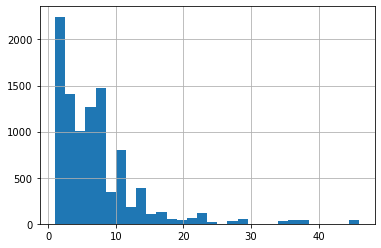

In [33]:
temp = df.groupby(["sequence", "cycle"])["pen"].count()
temp = temp.reset_index()
temp = temp.rename(columns={"pen":"c_counts"})
df = df.reset_index()
df = df.merge(temp, on=["sequence", "cycle"])
df = df.set_index('frame_number')        


df["c_counts"].hist(bins=30)

df = df.loc[(df["c_counts"] > 2) & (df["c_counts"] < 10)]

<AxesSubplot:>

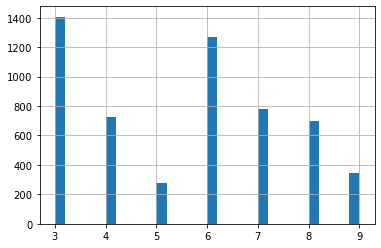

In [34]:
df["c_counts"].hist(bins=30)


In [35]:
#pd.set_option('display.max_columns', None)
#df[df["c_counts"] > 10].head(15)


<AxesSubplot:>

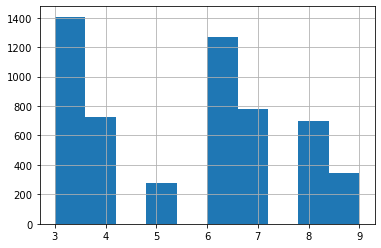

In [36]:
df["c_counts"].hist(bins=10)


In [37]:
df

,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,quad_coord,sequence,tail_coords,...,speed_frame,speed_cycle,distance_cycle,tail_diff,tail_diff_max,tail_diff_min,amplitude_cycle,length_of_fish_group,tail_uniformity,c_counts
frame_number,,,,,,,,,,,,,,,,,,,,,
1276,17.720045,"(680, 478)","(646, 463)","(697, 483)",1,356.0,2,"(440, 426, 408, 444)",21350,"((1.0, 1.0), (1.0315502838419943, 1.0), (1.063...",...,NaN,0.004360,11.401754,-1.970217e-03,2.220446e-16,0.007922,0.007922,17.822616,0.353731,6
1277,18.027756,"(682, 478)","(648, 463)","(699, 484)",1,361.0,2,"(440, 426, 408, 444)",21350,"((1.0, 1.0019270916974465), (1.030902797752337...",...,0.002013,0.004360,11.401754,-3.854183e-03,2.220446e-16,0.007922,0.007922,17.822616,0.353731,6
1278,18.027756,"(684, 479)","(648, 463)","(701, 485)",1,361.0,2,"(440, 426, 408, 444)",21350,"((1.0, 1.0), (1.030986970014337, 1.0), (1.0619...",...,0.005995,0.004360,11.401754,-7.922199e-03,2.220446e-16,0.007922,0.007922,17.822616,0.353731,6
1279,17.720045,"(686, 480)","(651, 466)","(703, 485)",1,354.0,2,"(440, 426, 408, 444)",21350,"((1.0, 0.9979858792876038), (1.032105088161948...",...,0.001880,0.004360,11.401754,-4.028241e-03,2.220446e-16,0.007922,0.007922,17.822616,0.353731,6
1280,17.720045,"(689, 481)","(654, 469)","(706, 486)",1,352.5,2,"(440, 426, 408, 444)",21350,"((1.0, 1.0), (1.0324424097190523, 1.0), (1.064...",...,0.008000,0.004360,11.401754,2.220446e-16,2.220446e-16,0.007922,0.007922,17.822616,0.353731,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18979,13.416408,"(813, 794)","(783, 786)","(825, 800)",1,285.0,2,"(440, 426, 408, 444)",27898,"((1.0, 0.9976923950792417), (1.036075294119456...",...,0.000997,0.000875,3.605551,3.461407e-03,4.511613e-03,0.001181,0.005692,13.301345,0.288026,6
18980,12.529964,"(813, 795)","(786, 786)","(824, 801)",1,274.0,2,"(440, 426, 408, 444)",27898,"((1.0, 0.9988720968587643), (1.035354480567640...",...,0.001283,0.000875,3.605551,4.511613e-03,4.511613e-03,0.001181,0.005692,13.301345,0.288026,6
18981,13.892444,"(813, 795)","(786, 786)","(825, 802)",1,270.5,2,"(440, 426, 408, 444)",27898,"((1.0, 0.9977441937175285), (1.036328499299896...",...,0.000000,0.000875,3.605551,4.511613e-03,4.511613e-03,0.001181,0.005692,13.301345,0.288026,6


In [38]:
df["fish_speed"] = df["distance_cycle"]/df["c_counts"]/df["length_of_fish_group"]


In [39]:
df["fish_uid"] = df.apply(lambda x: str(x.quadrant) + str(x.fish_id), axis = 1 )

In [40]:
#df["freq_veloc_esp"] = df["amplitude_cycle"]/df["fish_speed"]
#df["amp_veloc_esp"] = df["freq"]/df["fish_speed"]

In [41]:
graphs = df.groupby(["sequence", "cycle"])
to_graphs = graphs.tail(1)


In [42]:
to_graphs = to_graphs.loc[to_graphs["tail_uniformity"] < 1]

<AxesSubplot:>

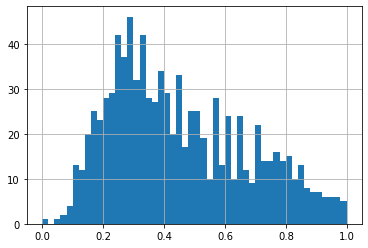

In [43]:
to_graphs.tail_uniformity.hist(bins=50)

In [44]:
df

,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,quad_coord,sequence,tail_coords,...,distance_cycle,tail_diff,tail_diff_max,tail_diff_min,amplitude_cycle,length_of_fish_group,tail_uniformity,c_counts,fish_speed,fish_uid
frame_number,,,,,,,,,,,,,,,,,,,,,
1276,17.720045,"(680, 478)","(646, 463)","(697, 483)",1,356.0,2,"(440, 426, 408, 444)",21350,"((1.0, 1.0), (1.0315502838419943, 1.0), (1.063...",...,11.401754,-1.970217e-03,2.220446e-16,0.007922,0.007922,17.822616,0.353731,6,0.106623,12
1277,18.027756,"(682, 478)","(648, 463)","(699, 484)",1,361.0,2,"(440, 426, 408, 444)",21350,"((1.0, 1.0019270916974465), (1.030902797752337...",...,11.401754,-3.854183e-03,2.220446e-16,0.007922,0.007922,17.822616,0.353731,6,0.106623,12
1278,18.027756,"(684, 479)","(648, 463)","(701, 485)",1,361.0,2,"(440, 426, 408, 444)",21350,"((1.0, 1.0), (1.030986970014337, 1.0), (1.0619...",...,11.401754,-7.922199e-03,2.220446e-16,0.007922,0.007922,17.822616,0.353731,6,0.106623,12
1279,17.720045,"(686, 480)","(651, 466)","(703, 485)",1,354.0,2,"(440, 426, 408, 444)",21350,"((1.0, 0.9979858792876038), (1.032105088161948...",...,11.401754,-4.028241e-03,2.220446e-16,0.007922,0.007922,17.822616,0.353731,6,0.106623,12
1280,17.720045,"(689, 481)","(654, 469)","(706, 486)",1,352.5,2,"(440, 426, 408, 444)",21350,"((1.0, 1.0), (1.0324424097190523, 1.0), (1.064...",...,11.401754,2.220446e-16,2.220446e-16,0.007922,0.007922,17.822616,0.353731,6,0.106623,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18979,13.416408,"(813, 794)","(783, 786)","(825, 800)",1,285.0,2,"(440, 426, 408, 444)",27898,"((1.0, 0.9976923950792417), (1.036075294119456...",...,3.605551,3.461407e-03,4.511613e-03,0.001181,0.005692,13.301345,0.288026,6,0.045178,12
18980,12.529964,"(813, 795)","(786, 786)","(824, 801)",1,274.0,2,"(440, 426, 408, 444)",27898,"((1.0, 0.9988720968587643), (1.035354480567640...",...,3.605551,4.511613e-03,4.511613e-03,0.001181,0.005692,13.301345,0.288026,6,0.045178,12
18981,13.892444,"(813, 795)","(786, 786)","(825, 802)",1,270.5,2,"(440, 426, 408, 444)",27898,"((1.0, 0.9977441937175285), (1.036328499299896...",...,3.605551,4.511613e-03,4.511613e-03,0.001181,0.005692,13.301345,0.288026,6,0.045178,12


In [45]:
only1 = to_graphs

In [46]:
only1

,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,quad_coord,sequence,tail_coords,...,distance_cycle,tail_diff,tail_diff_max,tail_diff_min,amplitude_cycle,length_of_fish_group,tail_uniformity,c_counts,fish_speed,fish_uid
frame_number,,,,,,,,,,,,,,,,,,,,,
1281,17.720045,"(691, 481)","(656, 468)","(708, 486)",1,360.0,2,"(440, 426, 408, 444)",21350,"((1.0, 1.001953832481265), (1.031075590734383,...",...,11.401754,0.000000,2.220446e-16,0.007922,0.007922,17.822616,0.353731,6,0.106623,12
1294,16.970563,"(731, 504)","(700, 481)","(743, 516)",1,353.5,2,"(440, 426, 408, 444)",21353,"((1.0, 0.9985193343700255), (1.033745313144293...",...,25.238859,0.009476,9.503474e-03,0.004394,0.013898,17.336652,0.634855,7,0.207973,12
1305,22.135944,"(138, 664)","(185, 654)","(117, 671)",0,618.5,1,"(0, 430, 414, 440)",6,"((1.0, 1.0014502623644659), (4.584182653224730...",...,1.000000,-0.002901,0.000000e+00,0.002901,0.002901,21.938868,0.177363,6,0.007597,01
1319,15.556349,"(706, 726)","(684, 699)","(717, 737)",1,329.0,1,"(440, 426, 408, 444)",14649,"((1.0, 1.0009107947550049), (1.025852135600572...",...,15.231546,-0.001041,8.403361e-04,0.002088,0.002928,15.084751,0.222023,8,0.126216,11
1329,21.840330,"(139, 664)","(185, 654)","(118, 670)",0,616.0,1,"(0, 430, 414, 440)",9,"((1.0, 1.0016574427022467), (3.586138494321781...",...,1.000000,-0.002279,-1.477043e-03,0.002279,0.000802,22.076821,0.188657,5,0.009059,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18941,14.866069,"(761, 438)","(792, 448)","(747, 433)",1,295.5,1,"(440, 426, 408, 444)",21298,"((1.0, 0.9978439015953399), (1.027651957465734...",...,20.223748,0.000000,6.625704e-03,0.004480,0.011106,13.394539,0.470589,6,0.251642,11
18953,14.142136,"(665, 401)","(637, 394)","(679, 403)",2,229.5,1,"(440, 0, 408, 403)",36213,"((1.0, 1.0), (1.2904308380911005, 1.0), (1.580...",...,7.071068,-0.004957,1.672016e-02,0.004957,0.021677,13.875312,0.974909,3,0.169872,21
18964,14.035669,"(714, 400)","(683, 402)","(728, 401)",2,248.0,1,"(440, 0, 408, 403)",36216,"((1.0, 0.995), (1.2929154671964176, 1.0), (1.5...",...,29.017236,0.002500,9.757022e-03,0.004988,0.014745,14.461304,0.803449,8,0.250818,21


<AxesSubplot:>

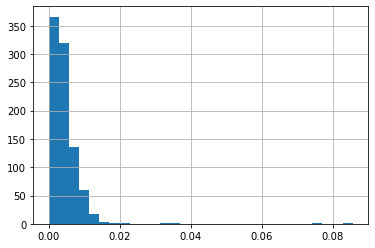

In [47]:
to_graphs["speed_cycle"].hist(bins=30)

In [48]:
only1 = only1.loc[only1["speed_cycle"] < 0.03]

Decimal Representation p: 0.000000000000000000000000000000
Decimal Representation r: 0.400268164314797780800603277385


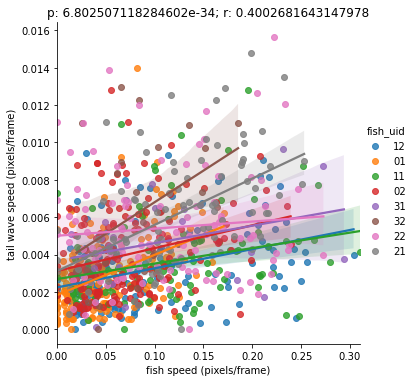

In [70]:
#to_graphs=to_graphs.loc[to_graphs["speed_cycle"] < 140]

#from scipy.stats import spearmanr
from scipy.stats.mstats import spearmanr


ax = sns.lmplot(data=only1, x="fish_speed", y="speed_cycle", hue="fish_uid") #.set(title='p: 0.00000050; r: 0.35')
r, pvalue = spearmanr(only1["fish_speed"], only1["speed_cycle"])
ax.set(xlabel='fish speed (pixels/frame)', ylabel='tail wave speed (pixels/frame)').set(title='p: ' + str(pvalue) + "; r: " + str(r))

print(f"Decimal Representation p: {pvalue:.30f}")
print(f"Decimal Representation r: {r:.30f}")

<AxesSubplot:>

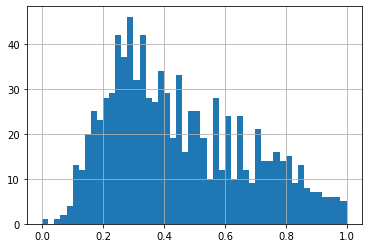

In [50]:

only1["tail_uniformity"].hist(bins=50)



In [51]:
'''from scipy.stats.mstats import spearmanr

ax = sns.lmplot(data=only1, x="freq", y="fish_speed")
r, pvalue = spearmanr(to_graphs["freq"], to_graphs["fish_speed"])
ax.set(xlabel='freq', ylabel='amplitude_cycle').set(title='p: ' + str(pvalue) + "; r: " + str(r))

print(pvalue)
print(f"Decimal Representation of p: {pvalue:.30f}")
print(f"Decimal Representation of r: {r:.30f}")'''

'from scipy.stats.mstats import spearmanr\n\nax = sns.lmplot(data=only1, x="freq", y="fish_speed")\nr, pvalue = spearmanr(to_graphs["freq"], to_graphs["fish_speed"])\nax.set(xlabel=\'freq\', ylabel=\'amplitude_cycle\').set(title=\'p: \' + str(pvalue) + "; r: " + str(r))\n\nprint(pvalue)\nprint(f"Decimal Representation of p: {pvalue:.30f}")\nprint(f"Decimal Representation of r: {r:.30f}")'

In [52]:
only1 = only1.loc[only1["fish_speed"] < 0.35]


2.9390249387952938e-24
Decimal Representation of p: 0.000000000000000000000002939025
Decimal Representation of r: 0.339442913949022762043483680827


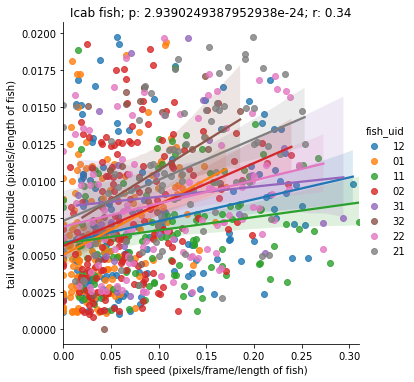

In [73]:
from scipy.stats.mstats import spearmanr

ax = sns.lmplot(data=only1, x="fish_speed", y="amplitude_cycle", hue="fish_uid")
r, pvalue = spearmanr(only1["fish_speed"], only1["amplitude_cycle"])
ax.set(xlabel='fish speed (pixels/frame/length of fish)', ylabel='tail wave amplitude (pixels/length of fish)').set(title='Icab fish; p: ' + str(pvalue) + "; r: " + str(round(r, 2)))

print(pvalue)
print(f"Decimal Representation of p: {pvalue:.30f}")
print(f"Decimal Representation of r: {r:.30f}")

In [54]:
#only1.loc[only1["amplitude_cycle"] < 0.01]

In [55]:
only1.columns

Index(['length_of_fish', 'center_of_mass', 'fish_tail', 'fish_head',
       'quadrant', 'fish_area', 'fish_id', 'quad_coord', 'sequence',
       'tail_coords', 'take', 'ant', 'pen', 'ult', 'cycle', 'diffs',
       'speed_frame', 'speed_cycle', 'distance_cycle', 'tail_diff',
       'tail_diff_max', 'tail_diff_min', 'amplitude_cycle',
       'length_of_fish_group', 'tail_uniformity', 'c_counts', 'fish_speed',
       'fish_uid'],
      dtype='object')

In [56]:
only1["freq"] = 1/((only1["amplitude_cycle"]*2)/only1["speed_cycle"])


In [57]:
only1.columns

Index(['length_of_fish', 'center_of_mass', 'fish_tail', 'fish_head',
       'quadrant', 'fish_area', 'fish_id', 'quad_coord', 'sequence',
       'tail_coords', 'take', 'ant', 'pen', 'ult', 'cycle', 'diffs',
       'speed_frame', 'speed_cycle', 'distance_cycle', 'tail_diff',
       'tail_diff_max', 'tail_diff_min', 'amplitude_cycle',
       'length_of_fish_group', 'tail_uniformity', 'c_counts', 'fish_speed',
       'fish_uid', 'freq'],
      dtype='object')

In [58]:
only1 = only1.loc[only1["freq"] <1]

In [59]:
only1["wl"] = only1["speed_cycle"] / only1["freq"]

0.038475534887992144
Decimal Representation of p: 0.038475534887992143828761015811
Decimal Representation of r: 0.071174526277568817000940271100


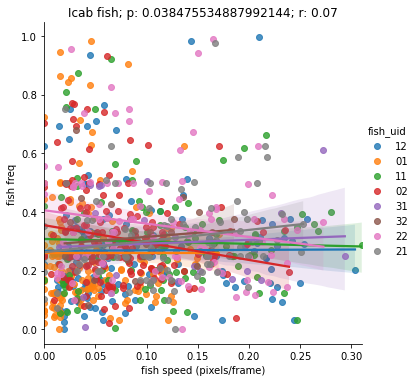

In [74]:

from scipy.stats.mstats import spearmanr

r, pvalue = spearmanr(only1["fish_speed"], only1["freq"])
ax = sns.lmplot(data=only1, x="fish_speed", y="freq", hue="fish_uid").set(title='Icab fish; p: ' + str(pvalue) + "; r: " + str(round(r, 2)))
ax.set(xlabel='fish speed (pixels/frame)', ylabel='fish freq')

print(pvalue)
print(f"Decimal Representation of p: {pvalue:.30f}")
print(f"Decimal Representation of r: {r:.30f}")

In [61]:
only1["freq*ampli"] = only1["amplitude_cycle"]*only1["freq"]

only1 = only1.loc[only1["freq*ampli"] < 0.008]


6.802507118284602e-34
Decimal Representation of p: 0.000000000000000000000000000000
Decimal Representation of r: 0.400268164314797780800603277385


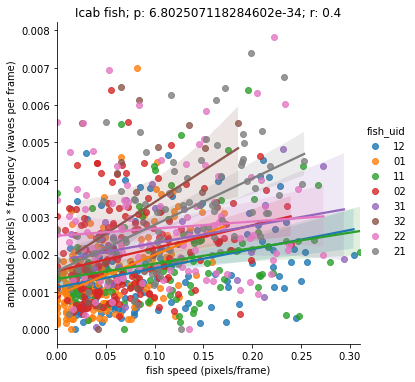

In [75]:
from scipy.stats.mstats import spearmanr

r, pvalue = spearmanr(only1["fish_speed"], only1["freq*ampli"])

ax = sns.lmplot(data=only1, x="fish_speed", y="freq*ampli", hue="fish_uid").set(title='Icab fish; p: ' + str(pvalue) + "; r: " + str(round(r, 2)))
ax.set(xlabel='fish speed (pixels/frame)', ylabel='amplitude (pixels) * frequency (waves per frame)')

print(pvalue)
print(f"Decimal Representation of p: {pvalue:.30f}")
print(f"Decimal Representation of r: {r:.30f}")

[Text(0.5, 0, ''), Text(0, 0.5, '')]

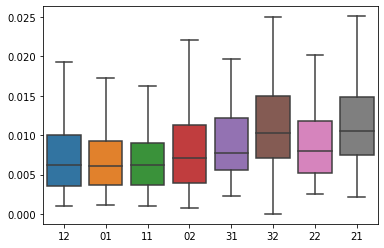

In [63]:
ax = sns.boxplot(data=only1, x="fish_uid", y="amplitude_cycle", showfliers = False)
ax.set(xlabel='', ylabel='')


[Text(0.5, 0, ''), Text(0, 0.5, '')]

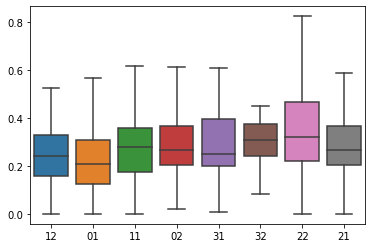

In [64]:
ax = sns.boxplot(data=only1, x="fish_uid", y="freq",showfliers = False)
ax.set(xlabel='', ylabel='')


[Text(0.5, 0, ''), Text(0, 0.5, '')]

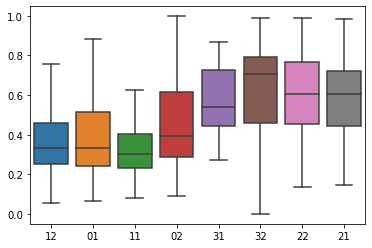

In [65]:
ax = sns.boxplot(data=only1, x="fish_uid", y="tail_uniformity", showfliers = False)
ax.set(xlabel='', ylabel='')

2.939606997867457e-24
Decimal Representation of p: 0.000000000000000000000002939607
Decimal Representation of r: 0.339442307785053298818667144587


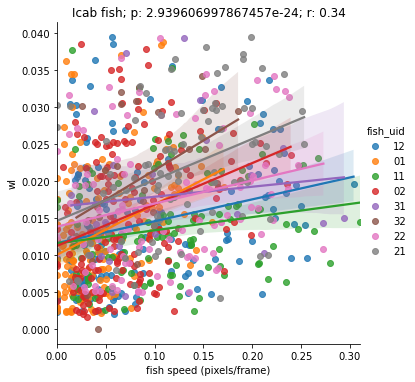

In [78]:

from scipy.stats.mstats import spearmanr

r, pvalue = spearmanr(only1["fish_speed"], only1["wl"])
ax = sns.lmplot(data=only1, x="fish_speed", y="wl", hue="fish_uid").set(title='Icab fish; p: ' + str(pvalue) + "; r: " + str(round(r, 2)))
ax.set(xlabel='fish speed (pixels/frame)', ylabel='wl')

print(pvalue)
print(f"Decimal Representation of p: {pvalue:.30f}")
print(f"Decimal Representation of r: {r:.30f}")

In [67]:
only1["wl*amp"] = only1["wl"] * only1["amplitude_cycle"]

In [68]:
only1 = only1.loc[only1["wl*amp"] <0.0008]

2.939606997867457e-24
Decimal Representation of p: 0.000000000000000000000002939607
Decimal Representation of r: 0.339442307785053298818667144587


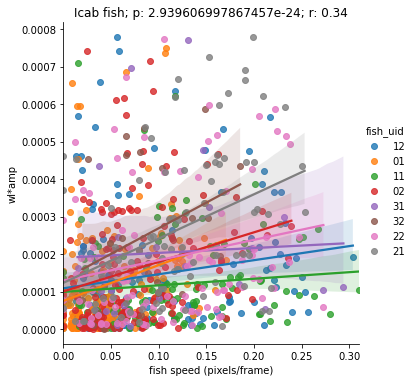

In [79]:
from scipy.stats.mstats import spearmanr

r, pvalue = spearmanr(only1["fish_speed"], only1["wl*amp"])
ax = sns.lmplot(data=only1, x="fish_speed", y="wl*amp", hue="fish_uid").set(title='Icab fish; p: ' + str(pvalue) + "; r: " + str(round(r, 2)))
ax.set(xlabel='fish speed (pixels/frame)', ylabel='wl*amp')

print(pvalue)
print(f"Decimal Representation of p: {pvalue:.30f}")
print(f"Decimal Representation of r: {r:.30f}")